# Simple Linear Regression using Scikit-Learn

> when we have a single feature as input and output a single label using it

In SLR, the relationship between the independent variable (feature) x and the dependent variable (leabel) y is represented by a straight line equation of the form:
<center> '$\hat{y} = \beta_0 + \beta_1 x$'<center>


In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv files are "comma separated value" txt files, a way to store data <br>
Delimiter specifies the way you have separated the data entries from one another. The csv files use "," which helps identify a separate data entry

In [ ]:
# import the data
path="https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv"

# using numpy
data=np.loadtxt(path,delimiter=",",skiprows=1)
#skiprow=1 because the first row consists\
# "YearsExperience" and "Salary" strings

# using pandas
df=pd.read_csv(path)

In [ ]:
print(data[0:5])

[[1.1000e+00 3.9343e+04]
 [1.3000e+00 4.6205e+04]
 [1.5000e+00 3.7731e+04]
 [2.0000e+00 4.3525e+04]
 [2.2000e+00 3.9891e+04]]


In [ ]:
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
# check the shape and size
print(df.shape,df.size)

(30, 2) 60


In [ ]:
x=data[:,0] # YearsExperience
y=data[:,1] # Salary
print(x.shape,y.shape)

(30,) (30,)


#### now that we have the required data we will separate it into two categories

- **Train data:** part of data we use to fit our model with which means to update the model parameters so it accurately predicts labels using feature data

- **Test data:** part of data we use for model evaluation, ie using unseen data (to the model) to test how well and accurately it predicts label values using given features and evaluate its performance

`model_selection.train_test_split()` function is a common utility in machine learning that allows you to split your dataset into training and testing subsets.

 Typically available in the sklearn.model_selection module from the scikit-learn library, this separation helps in evaluating the performance and generalization ability of a model.

In [ ]:
from sklearn import model_selection

x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

# here,
# x_train --> feature training examples
# y_train --> label training examples

In [ ]:
from sklearn.linear_model import LinearRegression

algorithm1=LinearRegression()
algorithm1.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.1  3.7  5.1 10.5  4.   3.2  3.   2.   4.9  7.1  9.5  6.   5.9  1.3
  4.1  8.7  9.   7.9  8.2  2.9  2.2  1.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### As you can see, `sklearn.linear_model` module's `LinearRegression()` function only works with 2D arrays as feature training data, *which simply means it needs atleast 2 or more features to work with*

But, in-case you're training an SLR model instad of MLR (multiple linear regression), it asks you to reshape the feature training data `x_train` into a 2D array here

`Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

In [ ]:
# Let's do the reshaping
new_x=data[:,0].reshape(-1,1)
print(new_x.shape)

(30, 1)


in `reshape(-1,1)`, the -1 indicates that the size of that dimension should be automatically inferred based on the array's length and the other specified dimension, while 1 indicates that the resulting array should have a shape of (n, 1), where n is the inferred size.

In [ ]:
print(x)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [ ]:
print(new_x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
# Let's do the test train split again
new_x_train,new_x_test,y_train,y_test = model_selection.train_test_split(new_x,y)

# and train it using the Linear Regression\
# statistical Leaning Method/Algorithm

algorithm2=LinearRegression()
algorithm2.fit(new_x_train,y_train)

LinearRegression()

#### linear regression has used our data that we gave to figure out model parameters to our slr model

let's get those learned parameters below:

In [ ]:
print(algorithm2.coef_) # slope (beta_not)

[9928.3622375]


In [ ]:
print(algorithm2.intercept_) # intercept (beta_one)

23308.939467489436


### Now that we have all the model parameters required, let's plot the linear equation it gives

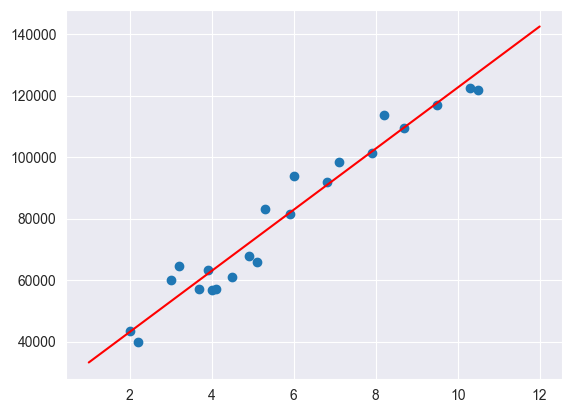

In [ ]:
m = algorithm2.coef_
c = algorithm2.intercept_

# creating new values for our Linear Regression plot
x_axis=np.linspace(1,12,100)
y_axis=m*x_axis+c

# scatterplot of actuall values (x,y) \
# to show the real distribution

train_1d=new_x_train.reshape(22) # reshape back to 1d array
plt.scatter(train_1d,y_train)

# linear regression plot
plt.plot(x_axis,y_axis,'r')
plt.show()

### This time I wanna see how well it is doing on testing data

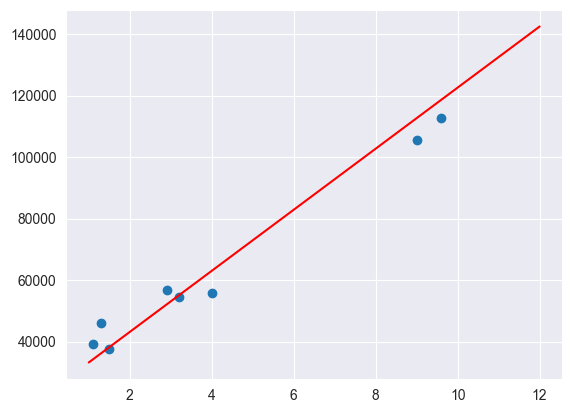

In [ ]:
# scatterplot of actuall values (x,y) \
# to show the real distribution

test_1d=new_x_test.reshape(8)
plt.scatter(test_1d,y_test)
# changed to test_1d & y_test

# # linear regression plot
plt.plot(x_axis,y_axis,'r')
plt.show()

#### From the looks of it, we did quite well, horray!!!

but now let's do some real stats based tests to check how good our SLR model fits the data ie GOODNESS OF FIT,  we'll do that next time